In [29]:
import pandas as pd
import os
pj = os.path.join
from utils import *
%matplotlib inline
from importlib import reload
import data_reader


<module 'data_reader' from '/data/notebooks/analyze-benz/data_reader.py'>

In [30]:
csv_path = 'predictions/predictions(76-0.9815-0.9727-0.9978.pt).csv' 
predicted = pd.read_csv(csv_path)
PATH = '/data/notebooks/dataset_oklahoma/spectrograms/test_set_benz_2/'

In [31]:
predicted = data_reader.dataframe_from_csv(csv_path, PATH)
predicted = data_reader.make_labels(predicted)

/data/notebooks/analyze-benz/data_reader.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predicted_times['Label'][true_positives_i] = 'True Positive'


In [32]:
predicted.head()

Name  Guess  True Label  \
0  11047      0           0   
1  15706      0           0   
2   2599      1           1   
3   1309      1           1   
4   1416      0           0   

                                            Filepath          Label  
0  /data/notebooks/dataset_oklahoma/spectrograms/...  True Negative  
1  /data/notebooks/dataset_oklahoma/spectrograms/...  True Negative  
2  /data/notebooks/dataset_oklahoma/spectrograms/...  True Positive  
3  /data/notebooks/dataset_oklahoma/spectrograms/...  True Positive  
4  /data/notebooks/dataset_oklahoma/spectrograms/...  True Negative

In [33]:
(false_positives, 
false_negatives, 
true_positives, 
true_negatives) = data_reader.df_confusion_matrix(predicted)


# True Negatives (in the dataset)

In [34]:
viz = visualize(true_negatives, show=10)

11047
15706
1416
3411
8413
7817
769
3640
15491
6846
514


/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


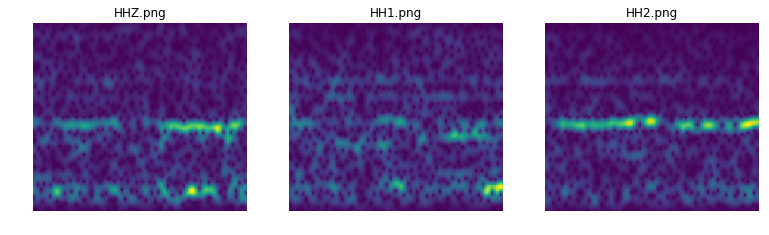

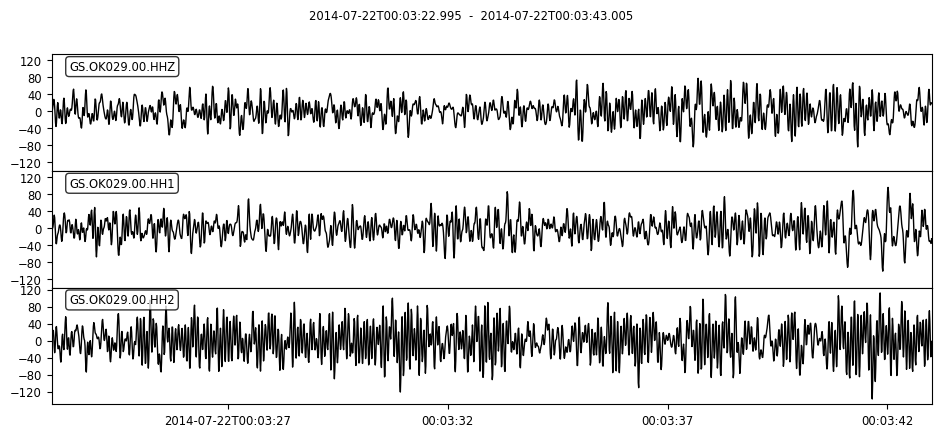

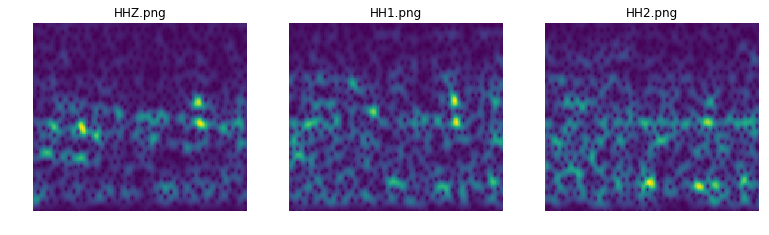

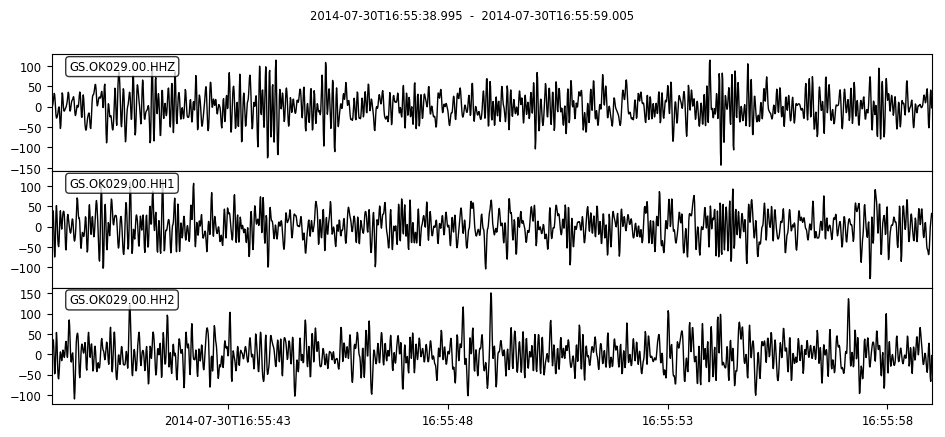

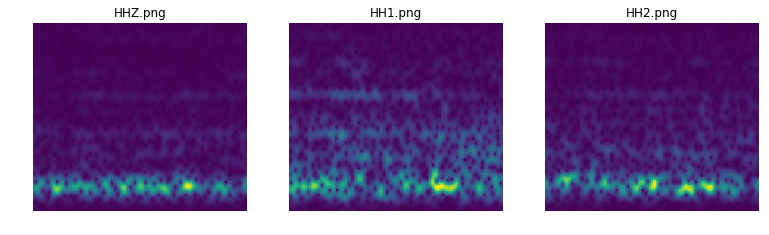

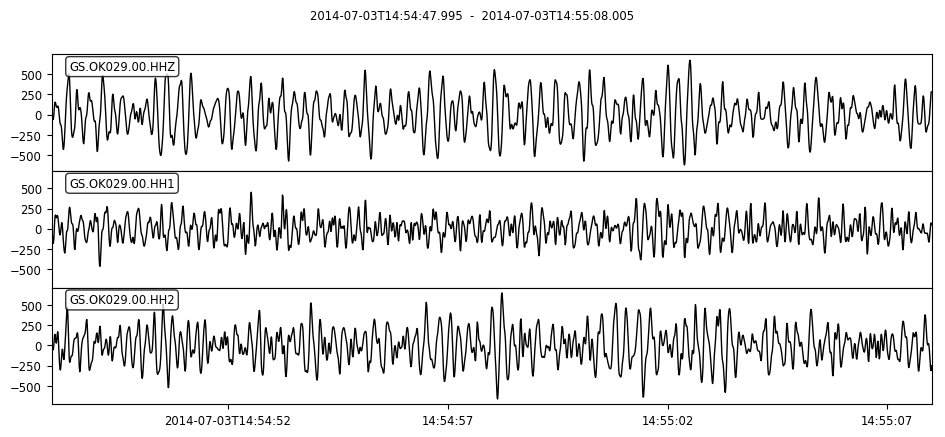

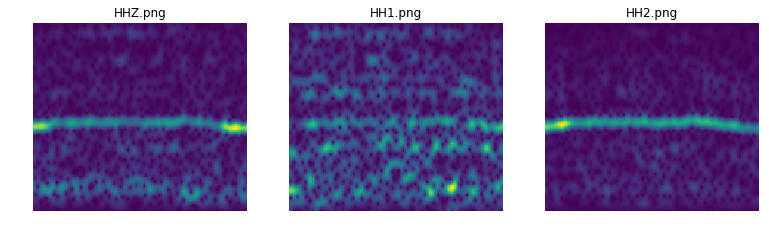

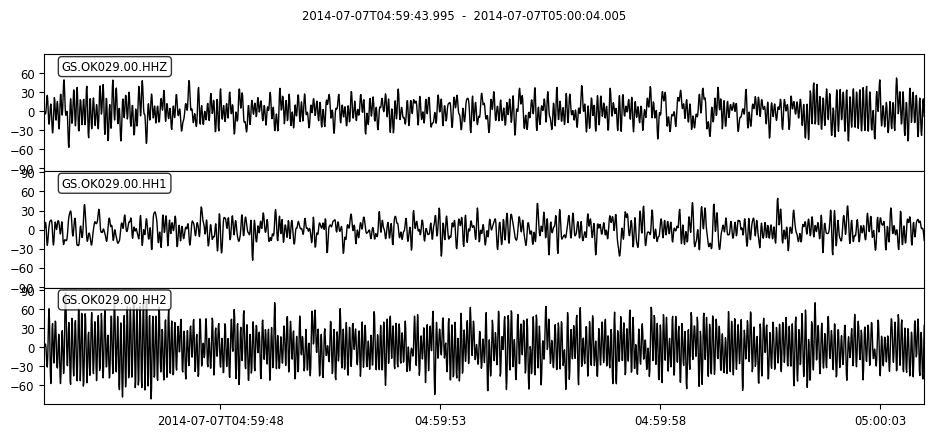

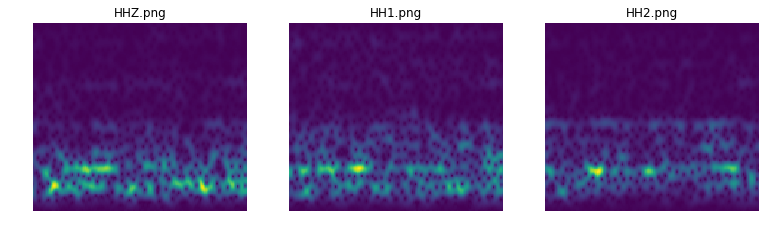

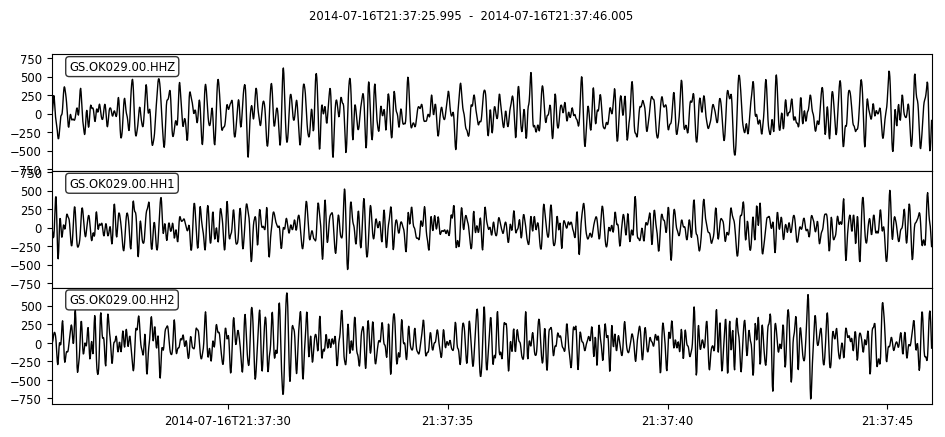

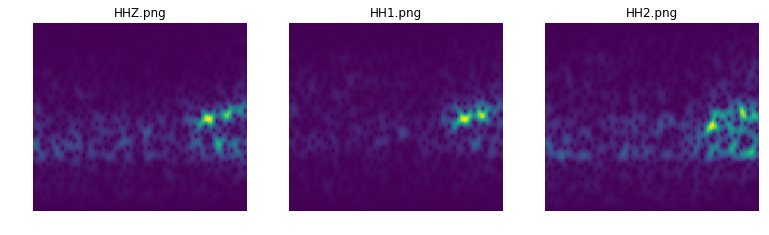

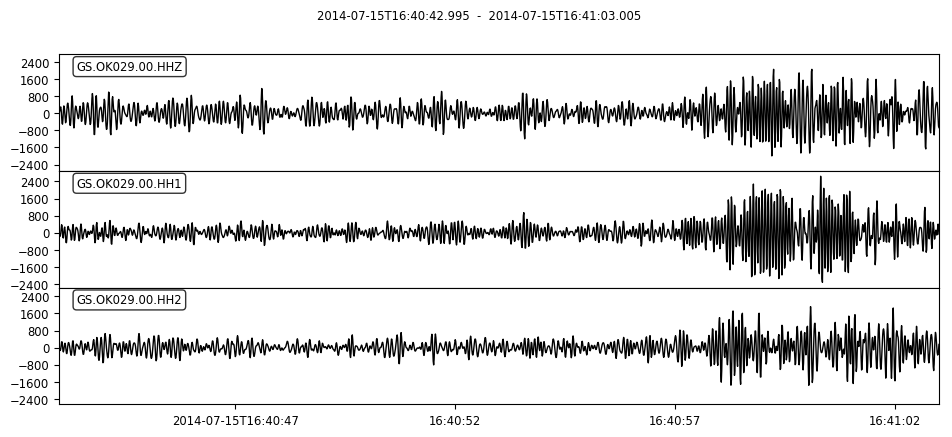

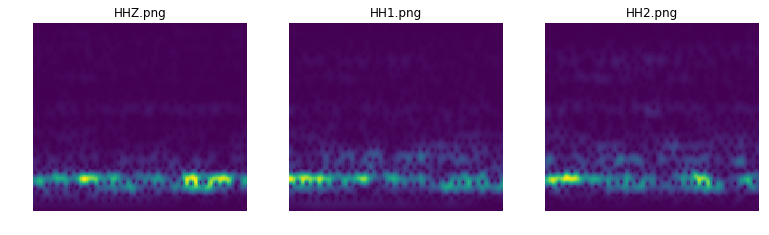

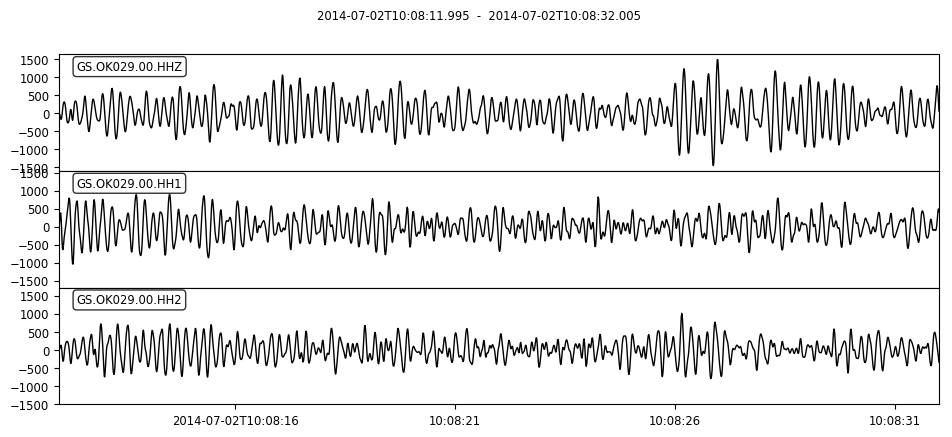

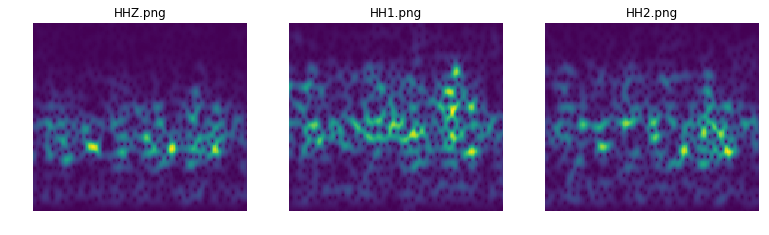

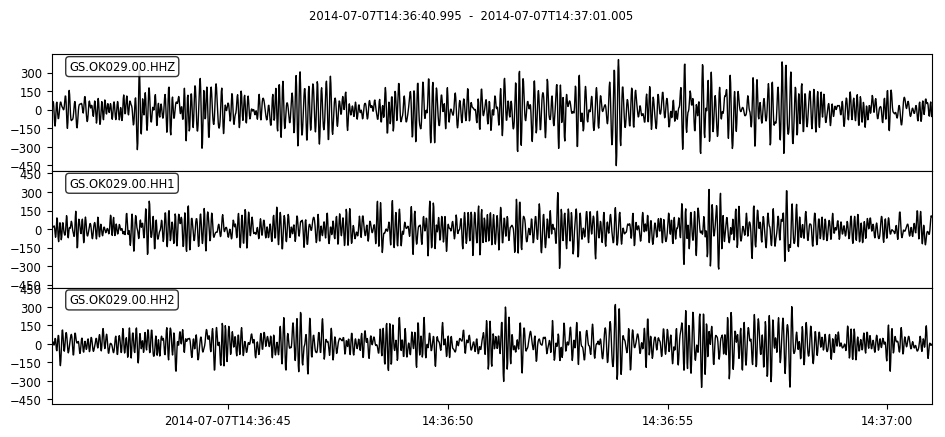

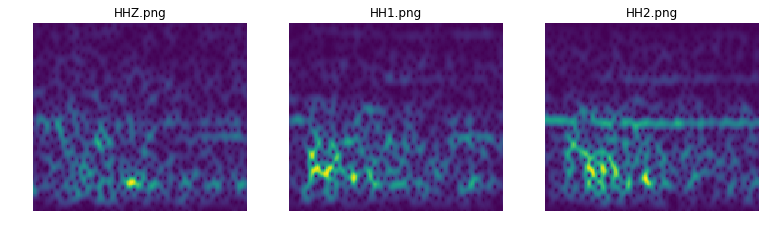

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


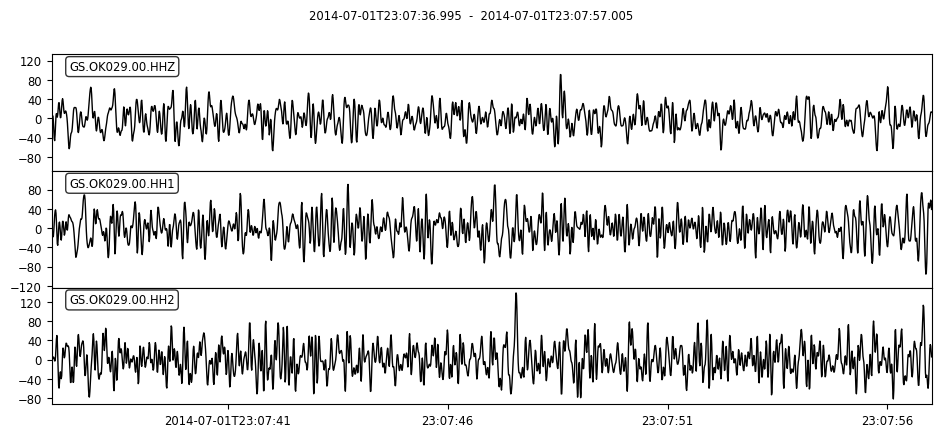

In [35]:
next(viz)

# True Positives (in the dataset)

In [57]:
viz = visualize(true_positives, show=10)

2599


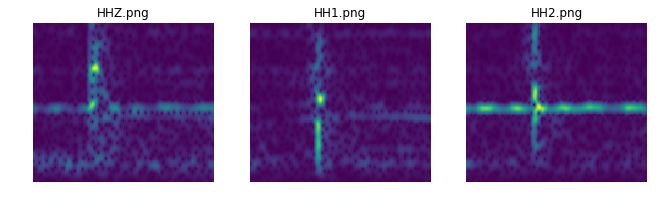

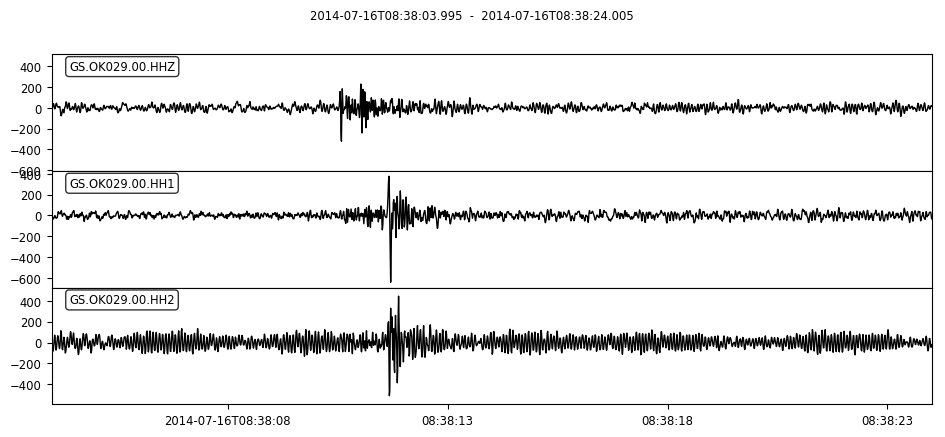

1309


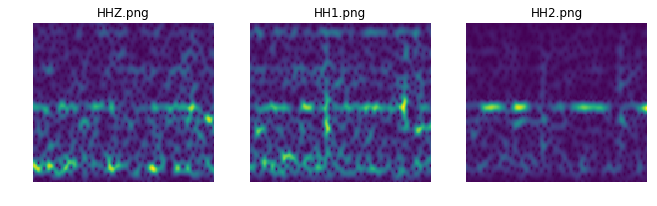

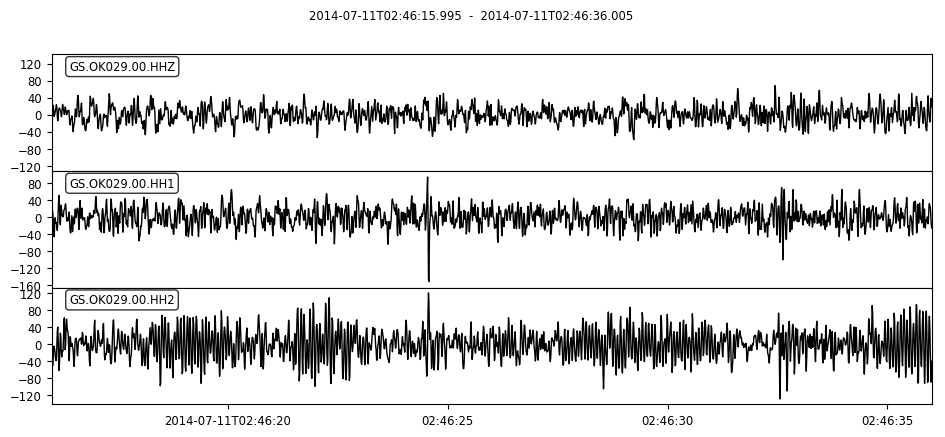

2001


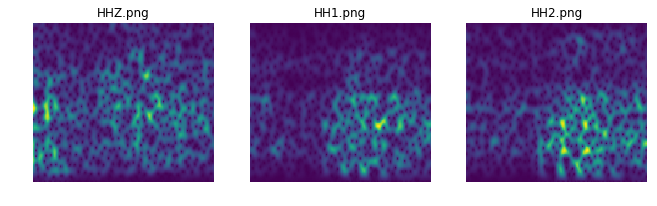

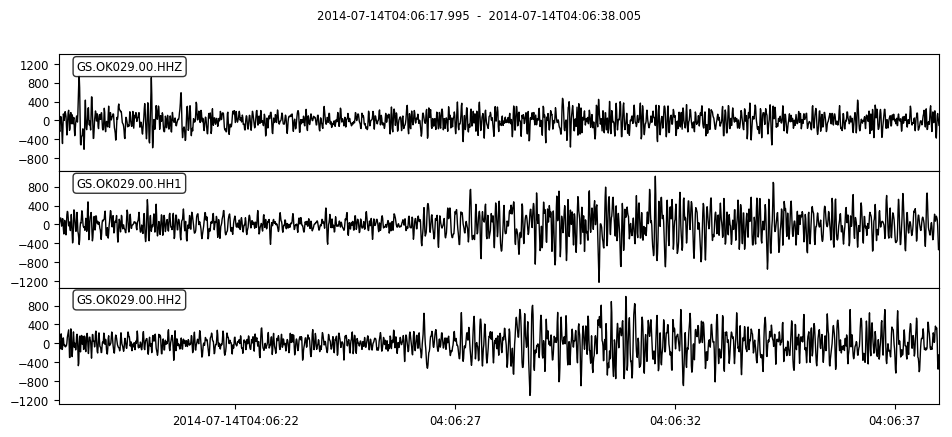

2439


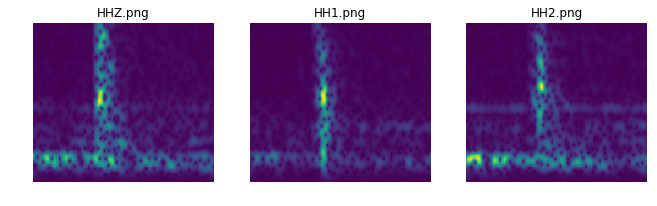

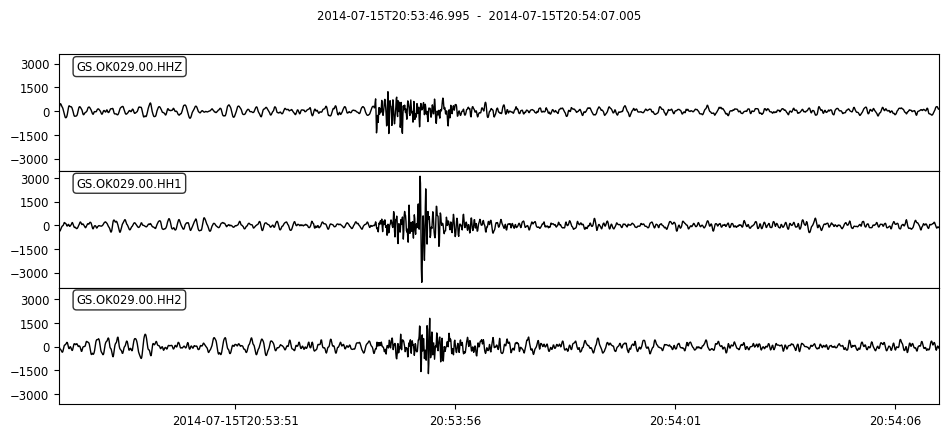

1175


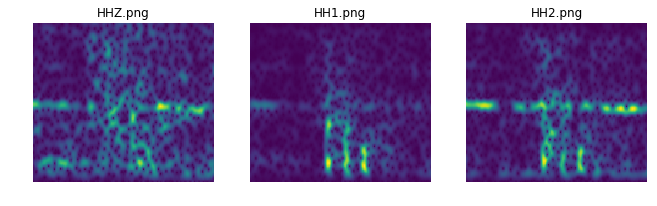

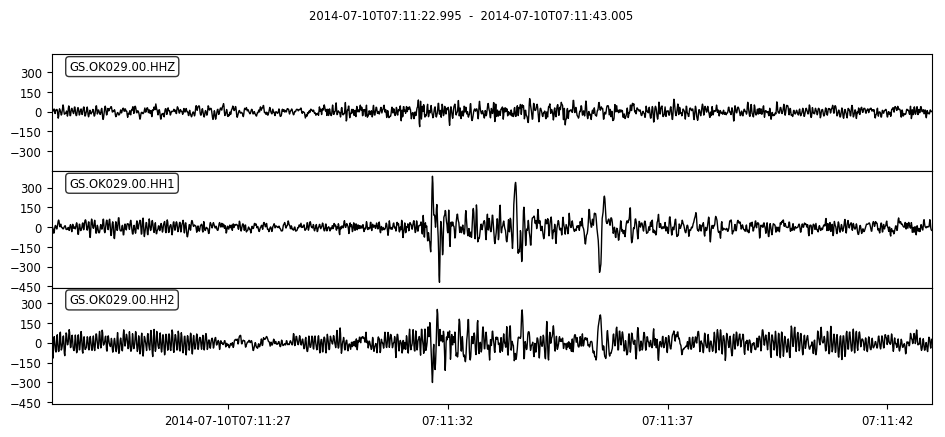

967


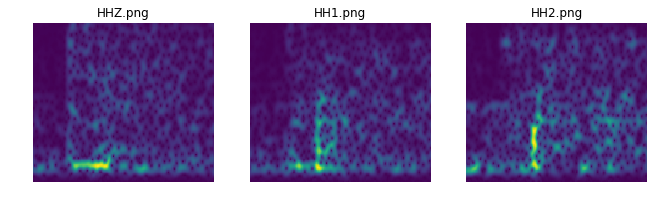

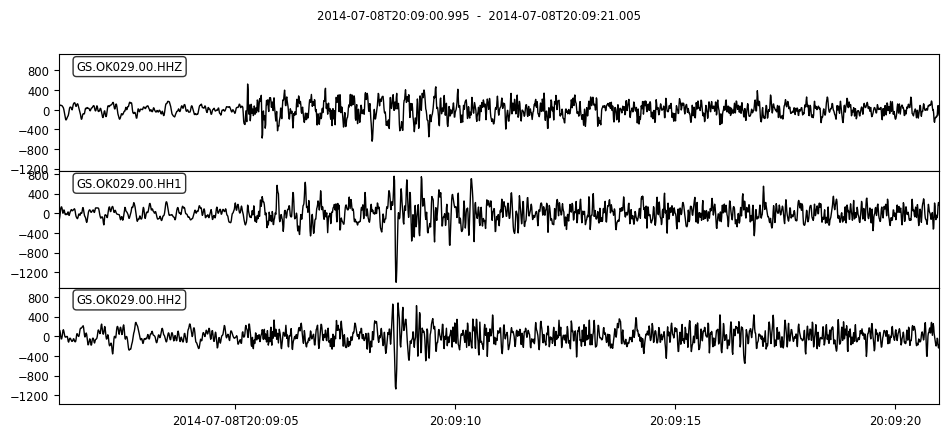

1491


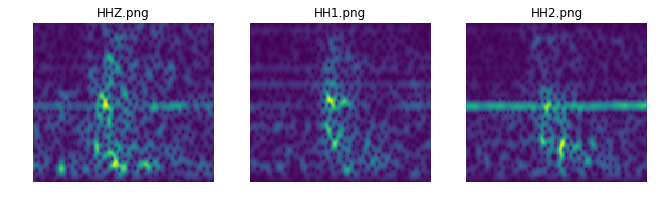

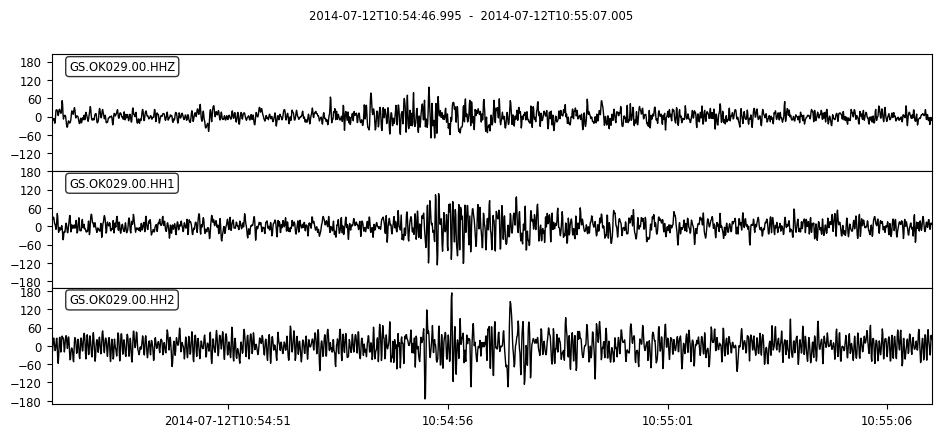

5417


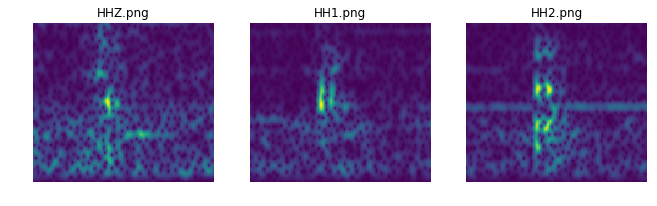

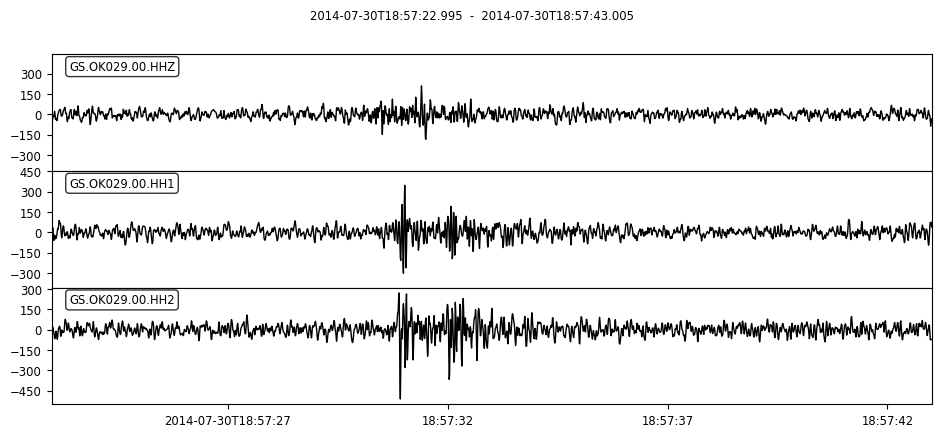

5274


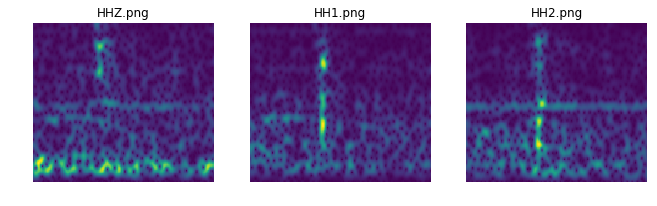

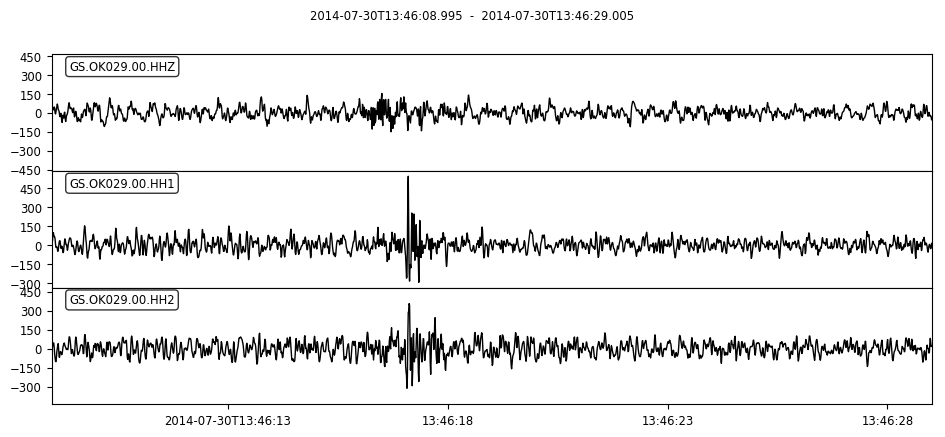

3481


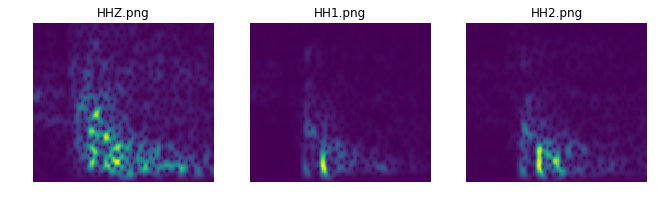

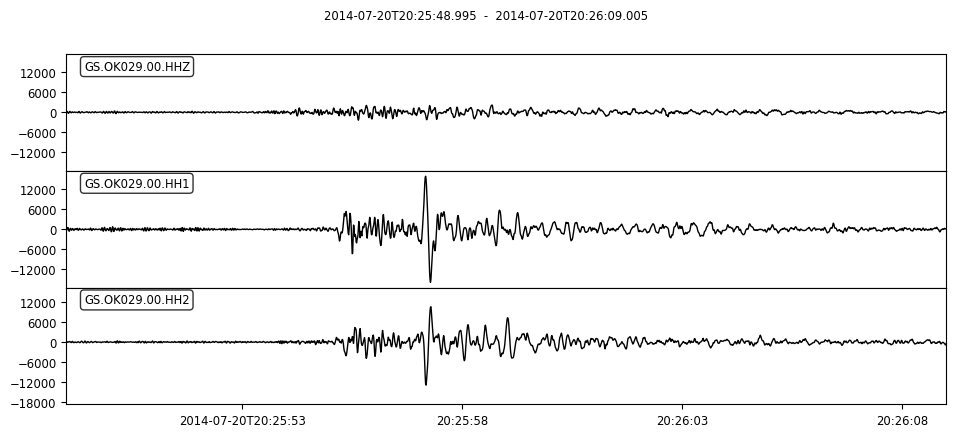

889


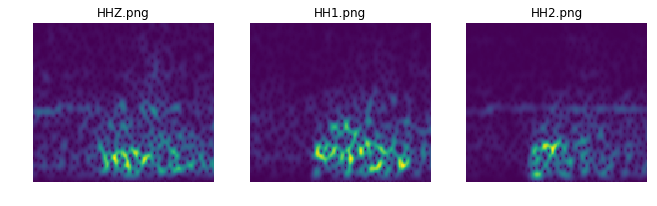

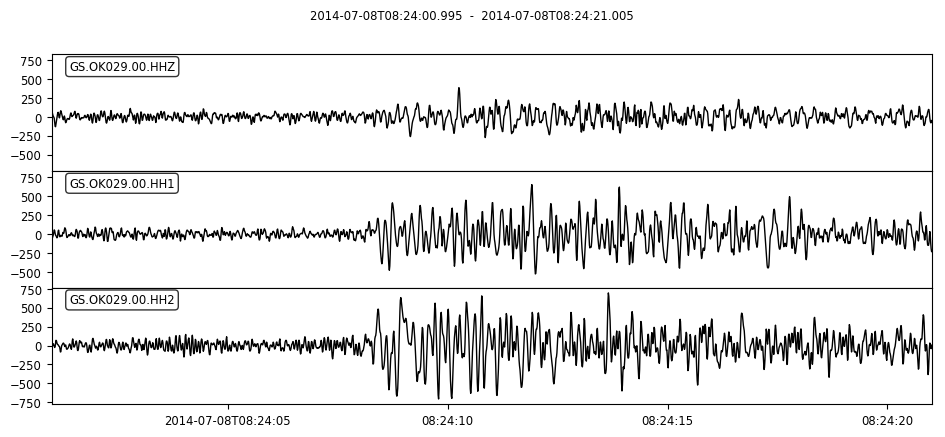

In [58]:
next(viz)

# False Positives (in the dataset)

In [79]:
viz = visualize(false_positives, show=10)
len(false_positives)

806

15369


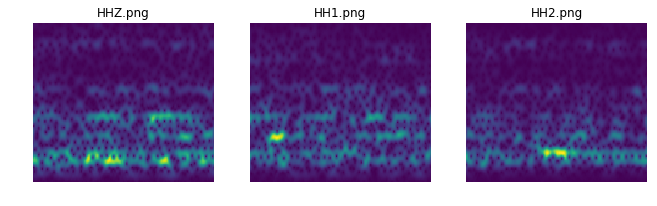

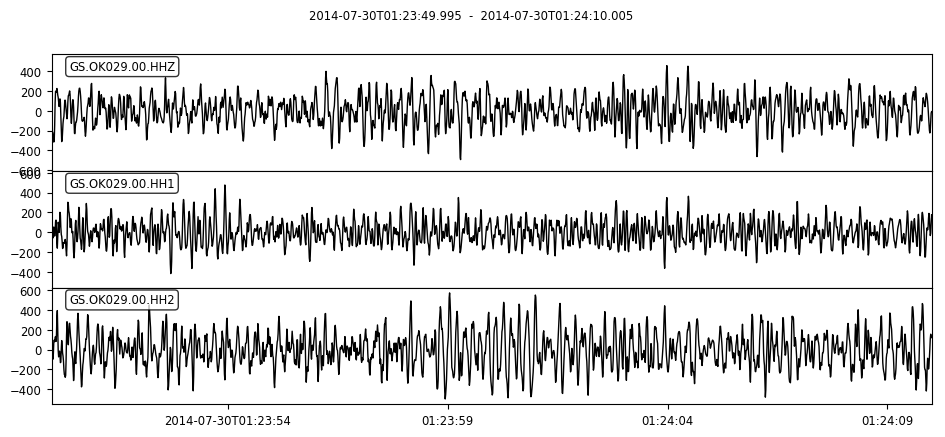

13093


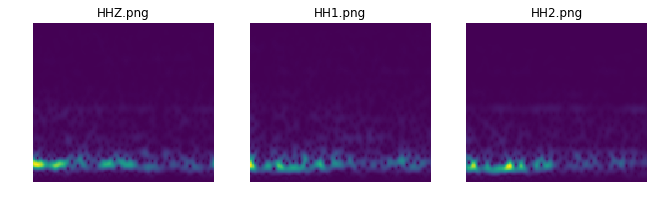

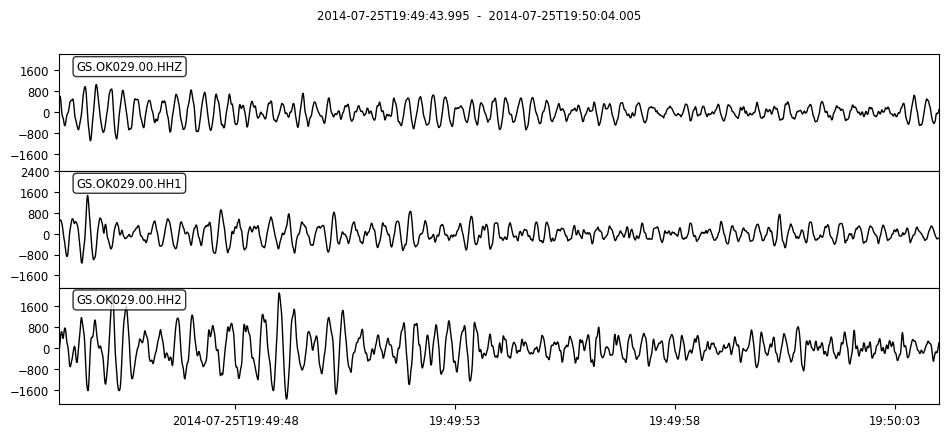

14811


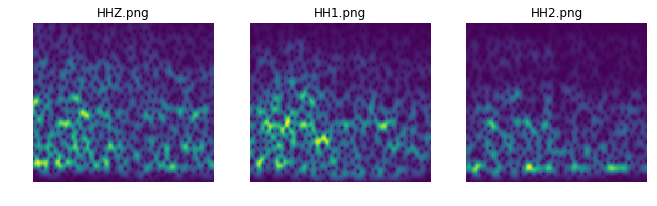

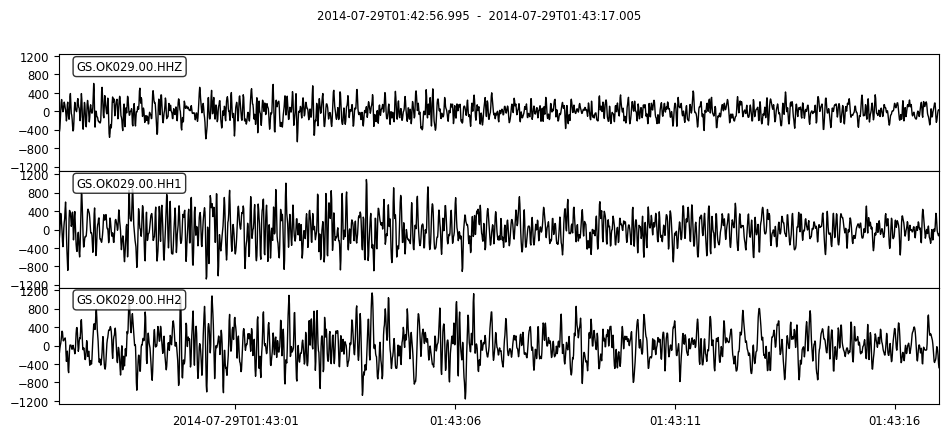

2495


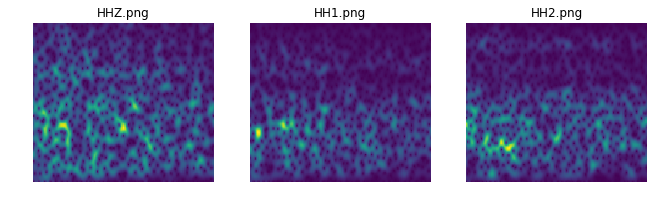

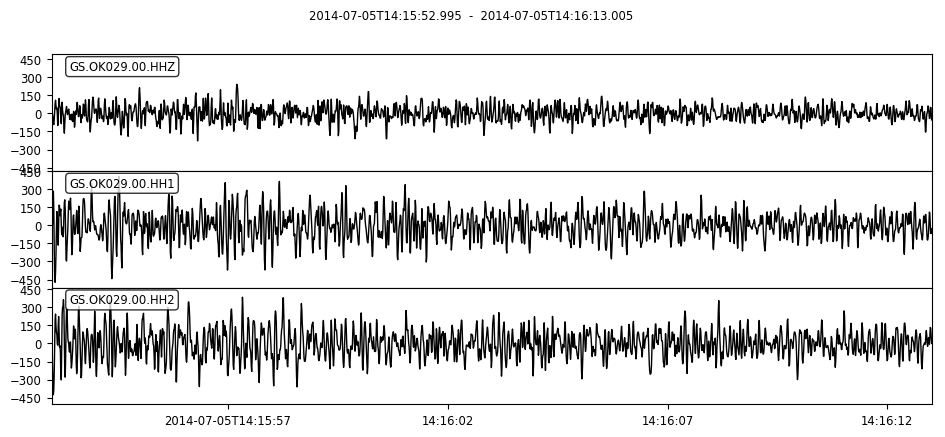

7143


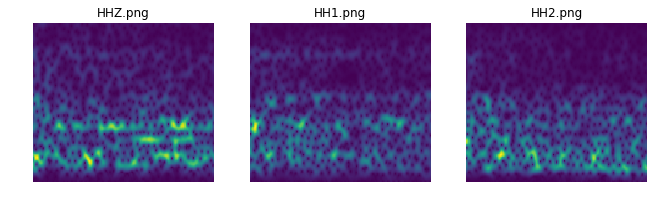

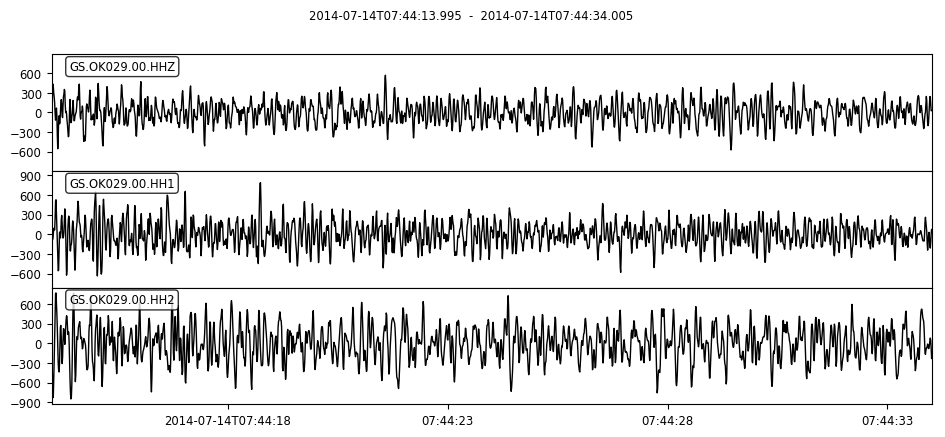

70


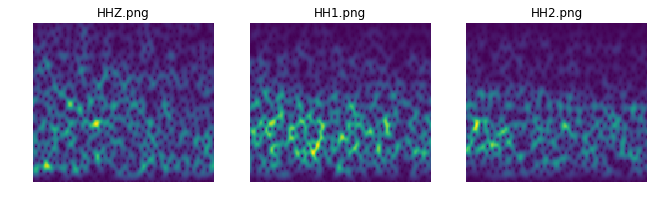

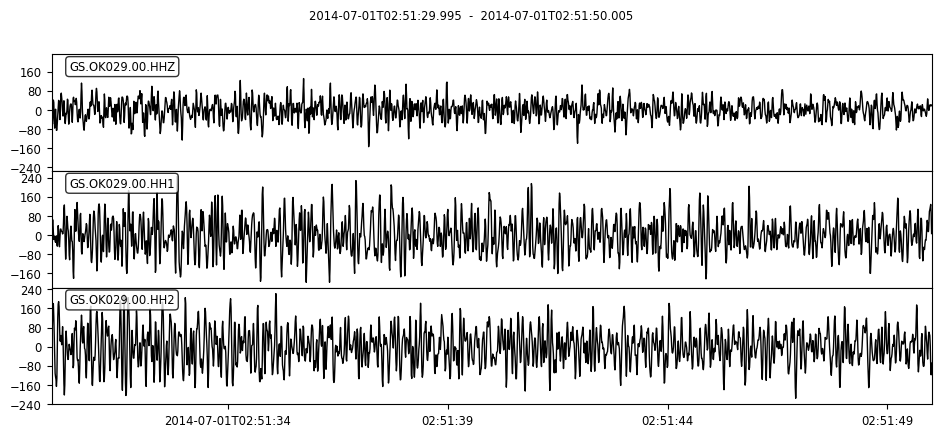

14866


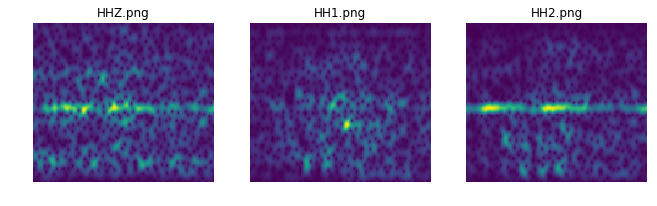

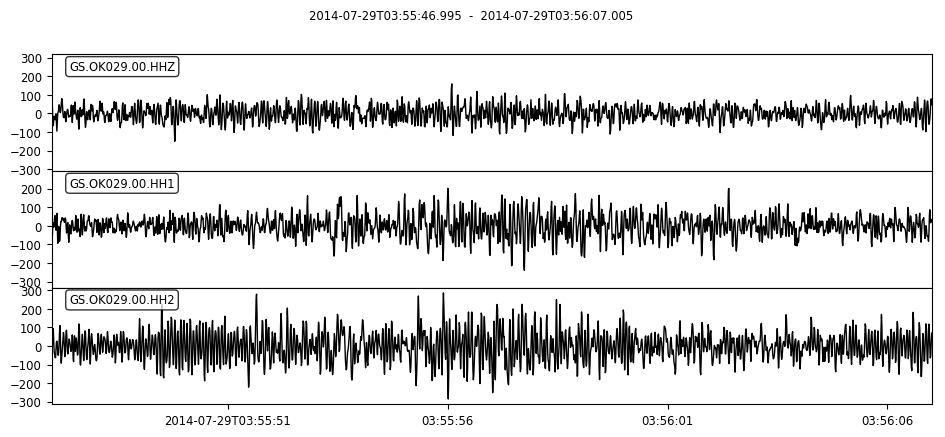

663


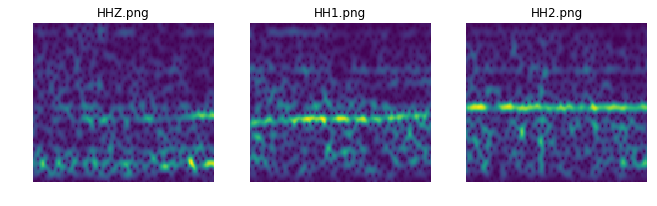

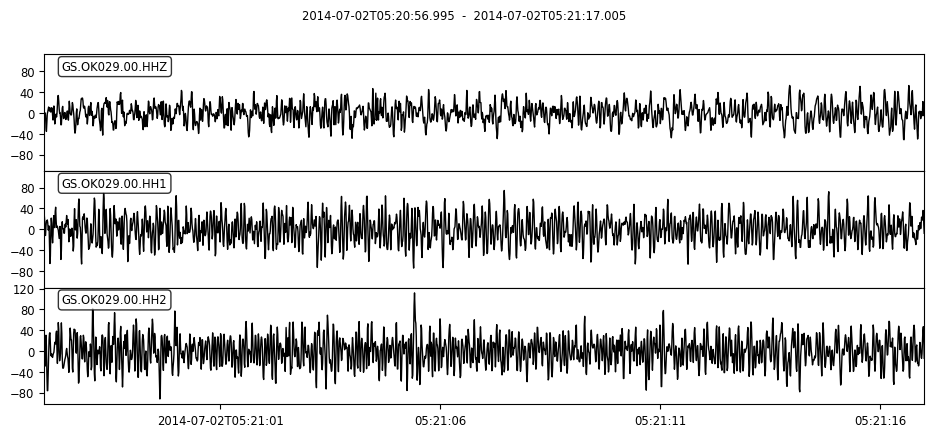

651


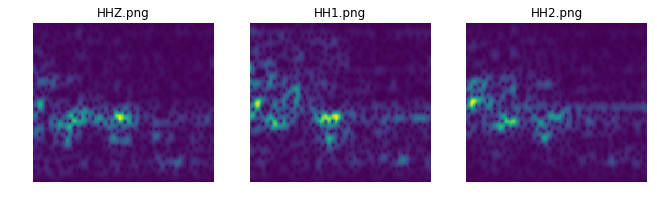

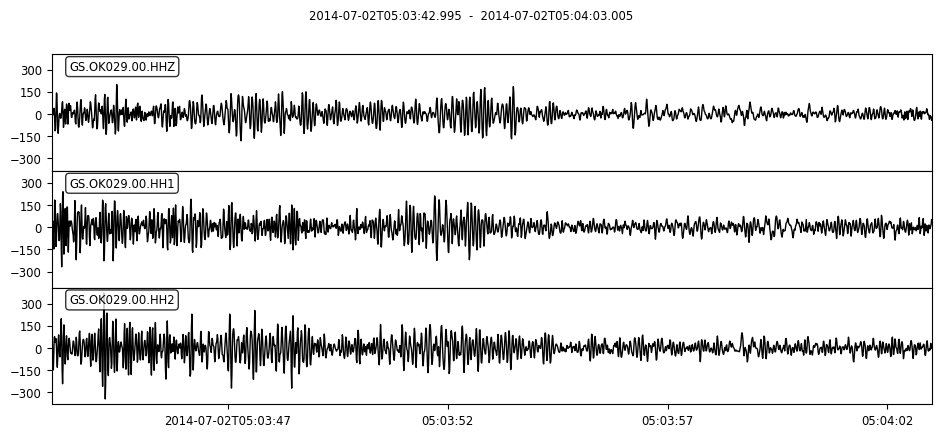

7812


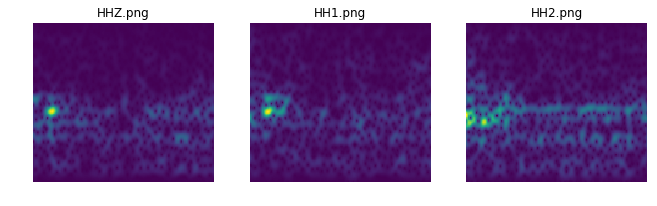

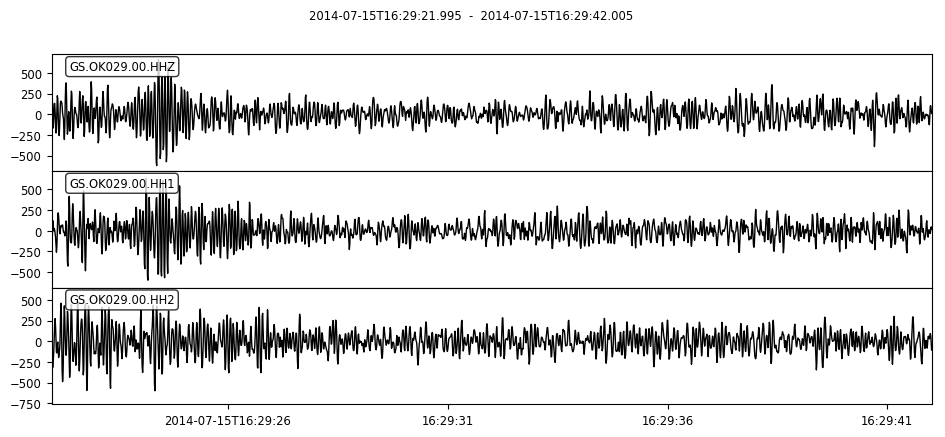

In [88]:
next(viz)

# False Negatives (in the dataset)

In [91]:
viz = visualize(false_negatives, show=30)
len(false_negatives)

106

In [ ]:
next(viz)

# Write Events and Noise

In [28]:
from sklearn.utils import shuffle

dfs_to_write = {'guessed_quake__true_noise': false_positives,
                'guessed_noise__true_quake': false_negatives,
                'true_positive': true_positives,
                'true_negative': true_negatives}

In [30]:
from utils import *
import matplotlib.pyplot as plt
import warnings

cwd = os.getcwd()
NUM_TO_WRITE = 500
WRITE_PATH = pj(cwd, 'images/testing')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
 
    for pathname, df in dfs_to_write.items():
        write_path = pj(WRITE_PATH, pathname)
        folder_paths = list(df['Filepath'])[:NUM_TO_WRITE]
        names = list(df['Name'])[:NUM_TO_WRITE]
        write_paths = [pj(write_path, name + '.png') for name in names]
        write_visualization_parallel(folder_paths, write_paths)

    plt.close('all')

100%|██████████| 500/500 [00:10<00:00, 49.38it/s]
